In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline  
import emcee
import math
import matplotlib
import scipy.optimize as op

hfont = {'fontname':'Times New roman'}

4.421052631578948 0.08626315789473685
4.435897435897436 0.11233333333333333


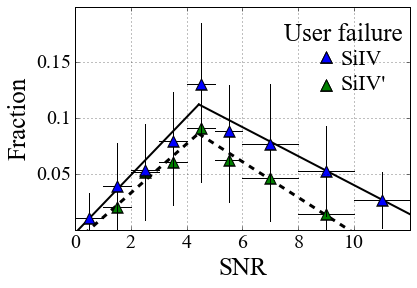

In [4]:
# plot the data
# x, y labels and title
plt.ylabel('Fraction', **hfont,  fontsize=25)
plt.xlabel('SNR', **hfont,  fontsize=25)


# x and y ranges and scale
plt.xlim([0.0, 12])
plt.ylim([0.0, 0.20])

# x and y ticks
xlabels = ['0', '2', '4', '6', '8', '10']
plt.xticks([0, 2, 4, 6, 8, 10], 
            xlabels, **hfont, fontsize = 20)
ylabels = ['0.05', '0.1', '0.15']
plt.yticks([0.05, 0.1, 0.15], 
            ylabels, **hfont, fontsize = 20)

plt.grid(True)

z = 1.96

min_sn = np.array([1.00, 2.00, 3.00, 4.00, 5.00, 6.00, 8.00])
max_sn = np.array([2.00, 3.00, 4.00, 5.00, 6.00, 8.00, 10.0])
mid_sn = 0.5*(max_sn - min_sn) + min_sn
value = np.array([0.0206186,  0.0515464,  0.0606061,  0.0910811,  0.0622581,  0.0466667,  0.0140741])



n = np.array([97, 97, 66, 74, 62, 90, 81])
ns = value*n
nf = n - ns
error = z*pow(ns*nf/n, 0.5)/100.0
error[np.where(error < 0.001)] = 0.001
upper_bound = value + error
lower_bound = value - error
upper_bound[np.where(upper_bound > 1.0)] = 1.0
common_x = (0.157 + 0.011)/(0.022 + 0.016)
print(common_x, 0.022*common_x - 0.011)


x = np.array([0, 0.5, 1.5, 2.5, common_x])
best_fit = 0.022*x - 0.011
plt.plot(x, best_fit, 'k--', lw = 3, alpha = 1)

x = np.array([common_x, 5.5, 7.0, 9.0, 14.2])
best_fit = -0.016*x + 0.157
plt.plot(x, best_fit, 'k--', lw = 3, alpha = 1)


# plot the vertical error bounds    
for i in range(0, len(min_sn)):
    plt.plot([mid_sn[i], mid_sn[i]], [upper_bound[i], lower_bound[i]], 'k-', lw=1.0)
# plot the horizontal bounds    
for i in range(0, len(min_sn)):
    plt.plot([min_sn[i], max_sn[i]], [value[i], value[i]], 'k-', lw=1.0)
# plot the results
plt.plot(mid_sn, value, 'k^', markersize=12, alpha=1.0)  
plt.plot(mid_sn, value, 'g^', markersize=10, alpha=1.0)   


min_sn = np.array([0.00, 1.00, 2.00, 3.00, 4.00, 5.00, 6.00, 8.00, 10.0])
max_sn = np.array([1.00, 2.00, 3.00, 4.00, 5.00, 6.00, 8.00, 10.0, 12.0])
mid_sn = 0.5*(max_sn - min_sn) + min_sn
value = np.array([0.0103030, 0.0390476, 0.0533333, 0.0797015, 0.1304350, 0.0885185, 0.0766038, 0.0529412, 0.0268750])


n = np.array([132, 105,  90,  67,  69,  54, 106,  85,  64])
ns = value*n
nf = n - ns
error = z*pow(ns*nf/n, 0.5)/100.0
error[np.where(error == 0)] = 0.0278
upper_bound = value + error
lower_bound = value - error
upper_bound[np.where(upper_bound > 1.0)] = 1.0
common_x = (0.17 + 0.003)/(0.026 + 0.013)
print(common_x, 0.026*common_x - 0.003)


# above : best_fit = 0.065*x + 0.019
x = np.array([0, 0.5, 1.5, 2.5, common_x])
best_fit = 0.026*x - 0.003
plt.plot(x, best_fit, 'k-', lw = 2, alpha = 1)

# below : best_fit = -0.025*x + 0.3
x = np.array([common_x, 5.5, 7.0, 9.0, 14.2])
best_fit = -0.013*x + 0.17
plt.plot(x, best_fit, 'k-', lw = 2, alpha = 1)


# plot the vertical error bounds    
for i in range(0, len(min_sn)):
    plt.plot([mid_sn[i], mid_sn[i]], [upper_bound[i], lower_bound[i]], 'k-', lw=1.0)

# plot the horizontal bounds    
for i in range(0, len(min_sn)):
    plt.plot([min_sn[i], max_sn[i]], [value[i], value[i]], 'k-', lw=1.0)

    
# plot the results
plt.plot(mid_sn, value, 'k^', markersize=12, alpha=1.0)  
plt.plot(mid_sn, value, 'b^', markersize=10, alpha=1.0)   

txt = plt.text(9.5, 0.148, "SiIV", **hfont,  fontsize=22)
plt.plot([9, 9], [0.155, 0.155], 'k^', markersize=12, alpha=1.0)  
plt.plot([9, 9], [0.155, 0.155], 'b^', markersize=10, alpha=1.0)   

txt = plt.text(9.5, 0.126, "SiIV'", **hfont,  fontsize=22)
plt.plot([9, 9], [0.13, 0.13], 'k^', markersize=12, alpha=1.0)  
plt.plot([9, 9], [0.13, 0.13], 'g^', markersize=10, alpha=1.0)   


txt = plt.text(7.5, 0.17, "User failure", **hfont,  fontsize=25)







plt.savefig('si4_user_failure.png', bbox_inches='tight', figsize=[24,12], dpi=500)